## Popular Data Science Questions

In this project, I looked at [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com/), a data science dedicated site from [Stack Exchange](https://stackexchange.com/) to figure out what is the best data science content to write about because I am planning to start posting short tutorials on [Data Science websites](https://towardsdatascience.com/) and want to know what's trending. 

### 1. Explore Stack Exchange

Stack Exchange is a network of 175 communities that are created and run by experts and enthusiasts like you who are passionate about a specific topics including mathematics, physics, philosophy, and data science.
Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Let's expolre Stack Exchange website, DSSE in particular and answer the following questions:

* What kind of questions are welcome on this site?
* What, other than questions, does the site's home subdivide into?
    * Does any of them look useful towards our goal?
    

#### What kind of questions are welcome on this site?

If we visit the help center in the website and goto [asking](https://datascience.stackexchange.com/help/asking) and explore more we can read more on  how to ask a question, what to ask a good question, what not to ask etc.

To answer our question, [this](https://datascience.stackexchange.com/help/on-topic) link clearly states that the questions must be ***on-topic*** about Data Science. The help center also states that the questions being asked be practical, answerable questions based on actual problems faced.
You can read more about it [here](https://datascience.stackexchange.com/help/dont-ask)

#### What, other than questions, does the site's home subdivide into? Does any of them look useful towards our goal?

Other than questions, the [home](https://datascience.stackexchange.com/] is subdivided into:
* Tags
* Users, and
* Unanswered

**Tag** is a keyword or label that categorizes your question with other, similar questions.
**Users** section lists all the users using the DSSE stack exchange webiste.
**Unanswered** section lists all the questions with no upvotes or accepted answers.

The **Tags** which categorizes the questions will be an important criteria for our goal, which is to figure out the best data sciene content to write about.

#### What information is available in each post?

Posts can be either unanswered questions or questions with answers.
If we go through the [questions](https://datascience.stackexchange.com/questions) section, notice that each post has a summary of the following:

* Votes - shows the number of upvotes or downvotes
* Answers - total number of answers posted in the respective question. If green, it shows that an answer post is selected as the solution by the user who posted the question.
* Number of views for the post
* Date and time when the post was created
* Username and the summary of his profile, who posted the question 
* The questions tags. 



### 2. Stack Exchange Data Explorer

Stack Exchange provides a public data base for each of its websites. We can query and explore Data Science Stack Exchange's database [here](https://data.stackexchange.com/datascience/query/new). 

Following are the tables in the Stack Exchange database schema which may be meaningful to our goal.
*** 1. Posts
1. Tags
1. PostTypes
1. PostTags
1. TagSynonyms ***

To investigate more, let's explore first 5 rows in Tags table.

| Id  	| TagName               	| Count 	| ExcerptPostId 	| WikiPostId 	|
|-----	|-----------------------	|-------	|---------------	|------------	|
| 1   	| definitions           	| 29    	| 105           	| 104        	|
| 2   	| machine-learning 7637 	| 4909  	| 4908          	|            	|
| 3   	| bigdata               	| 431   	| 66            	| 65         	|
| 5   	| data-mining           	| 994   	| 80            	| 79         	|
| 6   	| databases             	| 90    	| 8960          	| 8959       	|

Tags table has the tag name , the number of times the tag has been used in the questions asked with the post Ids.

### 3. Getting the Data

Let's extract relevant columns from `Posts` table for all the questions in 2019. `Posts` table had PostTypeId column which identifies the type of post.

`SELECT * FROM PostTypes;`

| Id | Name                |
|----|---------------------|
| 1  | Question            |
| 2  | Answer              |
| 3  | Wiki                |
| 4  | TagWikiExcerpt      |
| 5  | TagWiki             |
| 6  | ModeratorNomination |
| 7  | WikiPlaceholder     |
| 8  | PrivilegeWiki       |

`PostTypeId` 1 identifies a Question. Now let's query the questions in 2019.

`SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM Posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;` 
 
 The first 5 rows from the query result is shown below.
 
 | Id    | CreationDate        | Score | ViewCount | Tags                                                                     | AnswerCount | FavoriteCount |
|-------|---------------------|-------|-----------|--------------------------------------------------------------------------|-------------|---------------|
| 56030 | 2019-07-19 19:30:16 | 1     | 131       | <machine-learning><classification><data><class-imbalance>                | 0           |               |
| 56033 | 2019-07-19 19:38:11 | 0     | 33        | <classification><nlp><dataset>                                           | 1           |               |
| 56035 | 2019-07-19 20:17:25 | 0     | 176       | <machine-learning><python><xgboost><forecasting>                         | 1           |               |
| 56038 | 2019-07-19 22:58:54 | 0     | 286       | <neural-network><keras><tensorflow><cnn><gpu>                            | 0           |               |
| 56039 | 2019-07-19 23:08:56 | 1     | 96        | <neural-network><deep-learning><cnn><autoencoder><hyperparameter-tuning> | 0           |               |


The result of the query is stored in a file called `2019_questions.csv`

### 4. Explore and clean the data

To proceed further, let's explore the dataset to find missing values and clean the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)

%matplotlib inline

# open the dataset
questions = pd.read_csv('2019_questions.csv')
# first few rows
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [2]:
# check missing values
questions.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [3]:
# explore the summary of the DataFrame.
questions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


We notice that `FavoriteCount` ,a  non-null column holds `NaN` values which means the values are missing and needs to be cleaned to hold relevant values. The `Tags` column are strings and we need to transform the string to more suitable string notation that can use typical string methods. The types in each column looks adequate enough for the analysis, however for aptness `FavoriteCount` could be of type `int`.



First, fill the missing values in `FavoriteCount` with `0`

In [4]:
questions["FavoriteCount"].value_counts(dropna=False)

NaN      7432
 1.0      953
 2.0      205
 0.0      175
 3.0       43
 4.0       12
 5.0        8
 6.0        4
 7.0        4
 11.0       1
 8.0        1
 16.0       1
Name: FavoriteCount, dtype: int64

In [5]:
# replace missing values with value 0 and change type to int
questions["FavoriteCount"] =questions["FavoriteCount"].fillna(0).astype(int)
questions["FavoriteCount"].value_counts(dropna=False)

0     7607
1      953
2      205
3       43
4       12
5        8
7        4
6        4
11       1
16       1
8        1
Name: FavoriteCount, dtype: int64

Furthermore, let's clean the `Tags` column to transform it to a string representation which makes it easier for typical string manipulaiton using string methods.  

In [6]:
# remove the angle brackets and split on comma 
questions['Tags'] = questions['Tags'].str.replace('><',',').str.replace("<|>","").str.split(',')
questions['Tags'].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

### 4. Determine the most popular Tags

To determine the most popular tags we will consider the following:

* find the count of how many times a tag was used
* how many times a question with that tag was viewed



#### Count of number of times the tag was used
Now, find the total count of each tag used.

In [7]:
tag_count = {}
for t in questions["Tags"]:
    for tag in t:
        if tag in tag_count: 
            tag_count[tag] +=1
        else:
            tag_count[tag] =1
tag_count


{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 

For better readability, convert the dictionary object `tag_count` to DataFrame and sort it descending by `Count` of the tags to get the most used tags in the questions posted.

In [8]:
# convert dictionary object to Dataframe

### TagCount = pd.DataFrame(list(tag_count.items()), columns=['Tag','Count'])

# TagCount = pd.DataFrame.from_dict(tag_count,orient='index')
# TagCount.rename(columns={0: 'Count'},inplace=True)

# TagCount.head(10)



TagCount = (pd.DataFrame.from_dict(tag_count, orient='index')
        .rename_axis('Tags')         
        .reset_index())

TagCount.rename(columns={0: 'Count'},inplace=True)

TagCount.set_index('Tags', inplace=True)
TagCount


,Count
Tags,
reshape,9
anaconda,20
ab-test,6
data-leakage,8
objective-function,4
rstudio,15
privacy,6
weighted-data,14
gpu,42


In [9]:
# sort the values by total count of tags
sorted_tags = TagCount.sort_values(by='Count',ascending=False)
sorted_tags.head(10)

,Count
Tags,
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493


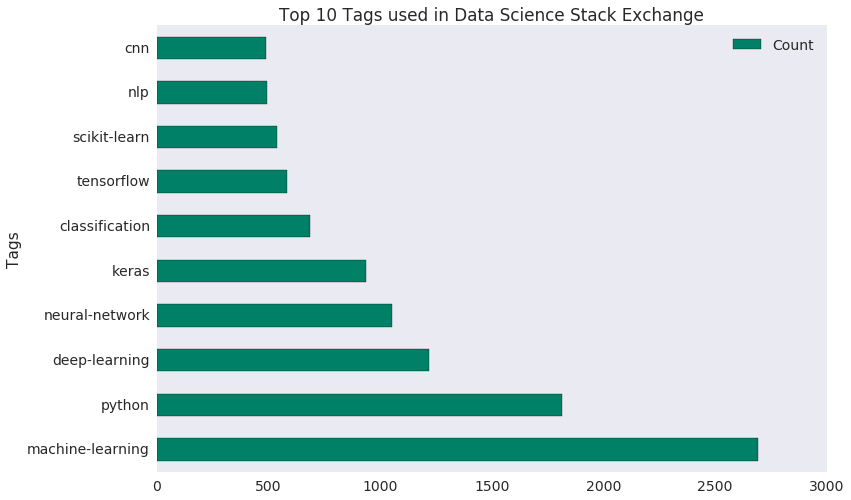

In [10]:

sorted_tags.head(10).plot(kind='barh',figsize=(12,8), colormap='summer', title='Top 10 Tags used in Data Science Stack Exchange',grid=False)


#### Count of total times the tag was viewed

Furthermore, let's investigate how many times each tag was viewed.

In [11]:
# view top views and associated tags
questions[["Tags", "ViewCount"]].sort_values(by=["ViewCount"], ascending=False).head(10)


,Tags,ViewCount
838,"[python, pandas]",33203
3035,"[python, dataframe, csv, data-formats]",28079
633,"[machine-learning, neural-network, deep-learni...",28060
764,"[data-mining, pandas]",12847
7718,"[scikit-learn, pandas, numpy]",11136
300,"[python, computer-vision, opencv]",11122
1514,"[pandas, dataframe, excel, data.table]",10597
6412,"[machine-learning, python]",9209
1647,"[deep-learning, gpu]",8977
4511,"[nlp, encoding, attention-mechanism, transformer]",8474


We note that the posts with tag python-pandas combination received the most number of views. But we need to find the count of views per each tag.In addition to `ViewCount`, for further analysis we are also finding the answers count and favorites count per tag from the dataset.

<a id='ans'></a>

In [12]:
tag_views = {}
ans_count={}
fav_count={}

for i, tags in enumerate(questions['Tags']):
    for t in tags:
        if t in tag_views:
            tag_views[t] += questions['ViewCount'].iloc[i]
            ans_count[t] += questions['AnswerCount'].iloc[i]
            fav_count[t] += questions['FavoriteCount'].iloc[i]
        else:
            tag_views[t] = questions['ViewCount'].iloc[i]
            ans_count[t] = questions['AnswerCount'].iloc[i]
            fav_count[t] = questions['FavoriteCount'].iloc[i]

ViewCount = (pd.DataFrame.from_dict(tag_views, orient='index')
        .rename_axis('Tags')         
        .reset_index())

ViewCount.rename(columns={0: 'ViewCount'},inplace=True)

ViewCount.set_index('Tags', inplace=True)
print("Top 10 most viewed Tags \n")
sorted_view_count = ViewCount.sort_values(by='ViewCount', ascending=False)      
sorted_view_count.head(10)


Top 10 most viewed Tags 



,ViewCount
Tags,
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457


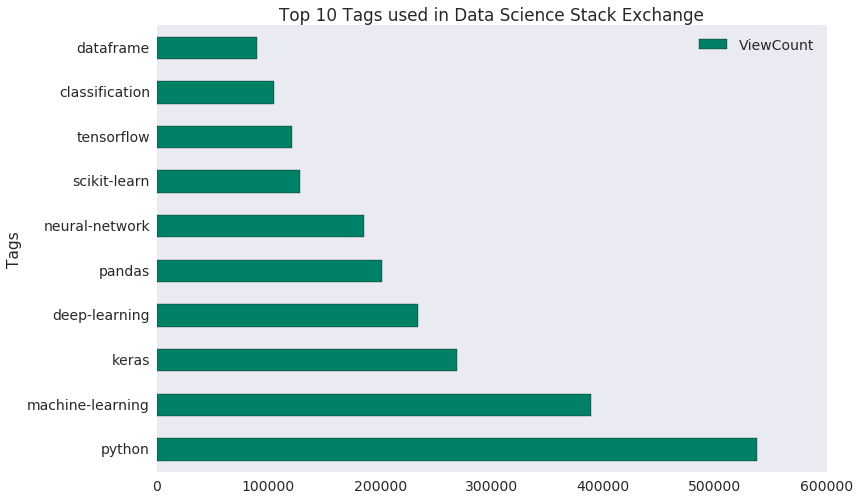

In [13]:
sorted_view_count.head(10).plot(kind='barh',figsize=(12,8), colormap='summer', title='Top 10 Tags used in Data Science Stack Exchange',grid=False)


From the above chart, posts with ***python*** were viewed more , followed by ***machine-learning***. For comparison, let's plot the two charts we plotted above side-by-side.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c285d42b0>],
      dtype=object)

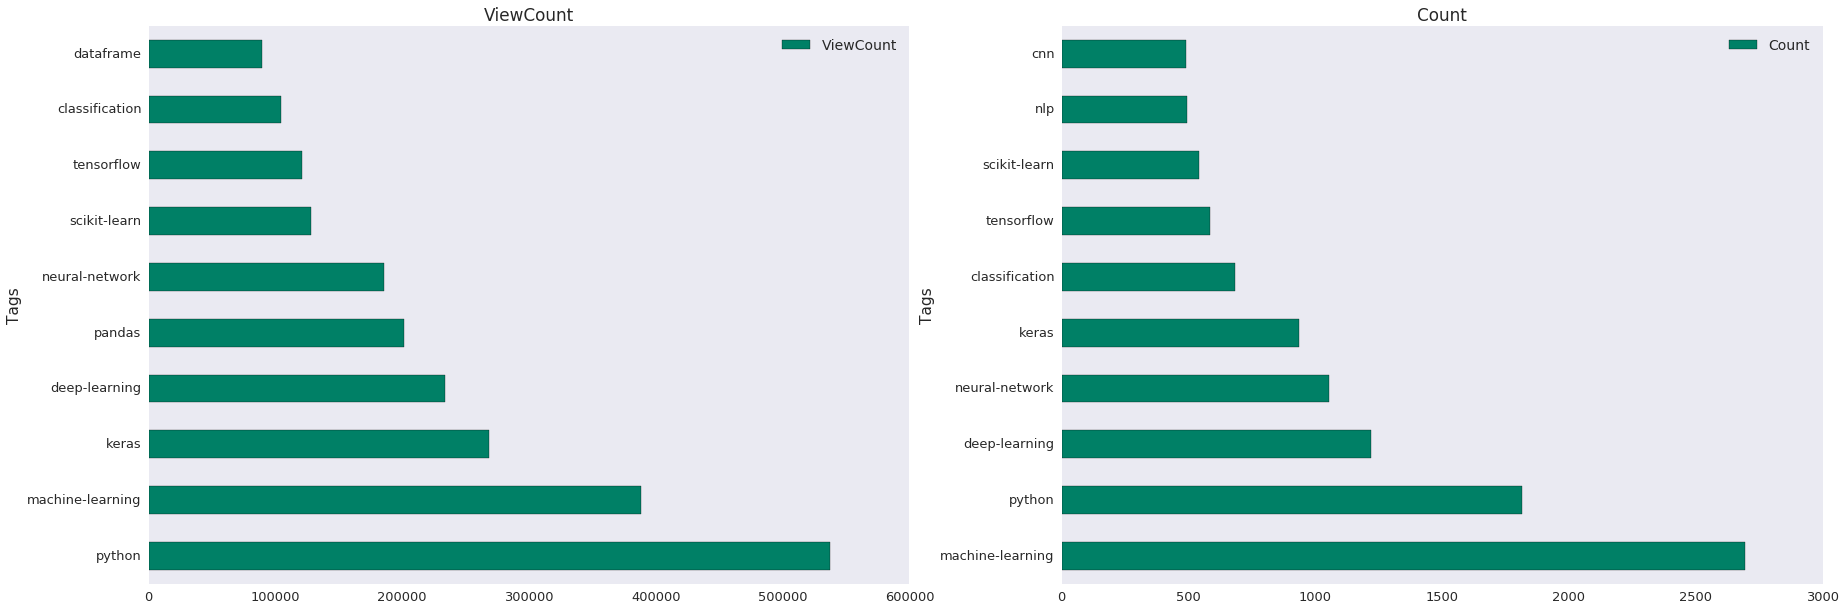

In [14]:

fig, axs = plt.subplots(1, 2, figsize=(30,10))

sorted_view_count.head(10).plot(kind='barh', ax=axs[0], subplots=True, colormap='summer',grid=False,fontsize=13)
sorted_tags.head(10).plot(kind='barh', ax=axs[1], subplots=True,colormap='summer',grid=False,fontsize=13)
 


### 5. Relation between Tags


In [15]:
most_used = sorted_view_count.head(20)
most_viewed = sorted_tags.head(20)
# merge most used and most viewed by left join 
in_used = pd.merge(most_used,most_viewed, how="left", left_index=True,right_index=True)
in_used

,ViewCount,Count
Tags,,
python,537585,1814.0
machine-learning,388499,2693.0
keras,268608,935.0
deep-learning,233628,1220.0
pandas,201787,354.0
neural-network,185367,1055.0
scikit-learn,128110,540.0
tensorflow,121369,584.0
classification,104457,685.0


In [16]:
# merge most used and most viewed by right join 
in_views = pd.merge(most_used,most_viewed, how="right", left_index=True,right_index=True)
in_views


,ViewCount,Count
Tags,,
machine-learning,388499.0,2693
python,537585.0,1814
deep-learning,233628.0,1220
neural-network,185367.0,1055
keras,268608.0,935
classification,104457.0,685
tensorflow,121369.0,584
scikit-learn,128110.0,540
nlp,71382.0,493


In [17]:
# find the missing tags in in_views and in_used
pd.concat([in_used,in_views]).drop_duplicates(keep=False)

,ViewCount,Count
Tags,,
dataframe,89352.0,NaN
numpy,49767.0,NaN
pytorch,40240.0,NaN
csv,38654.0,NaN
r,NaN,268.0
predictive-modeling,NaN,265.0
statistics,NaN,234.0
machine-learning-model,NaN,224.0


From the top 20, we can see that tags present in `most_used` and not present in `most_viewed` are:

* r
* predictive-modeling
* statistics
* machine-learning-model

And the tags present in most_viewed but not in most_used are:

* dataframe
* numpy
* pytorch
* csv


Some tags also stand out as being related. For example, `python` is related to `pandas`, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all, like pandas and r:

In [18]:
questions[questions["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)
]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr]",0,0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases]",3,0


Let's determine how the tags are related.

In [19]:
# Create a dataframe with rows and columns representing the Tags
all_tags = pd.DataFrame(index=TagCount.index, columns=TagCount.index)
all_tags.head()

Tags,reshape,anaconda,ab-test,data-leakage,objective-function,rstudio,privacy,weighted-data,gpu,audio-recognition,...,torch,goss,automation,hog,data-indexing-techniques,unsupervised-learning,ann,logistic-regression,chatbot,data-cleaning
Tags,,,,,,,,,,,,,,,,,,,,,
reshape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anaconda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ab-test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-leakage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objective-function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, remove all the `NaN` from the dataframe and make it zero. Then we will count the tags and update the `all_tags` dataframe.

In [20]:
# fill NaN with zeros
all_tags.fillna(0,inplace=True)
all_tags.head(4)

Tags,reshape,anaconda,ab-test,data-leakage,objective-function,rstudio,privacy,weighted-data,gpu,audio-recognition,...,torch,goss,automation,hog,data-indexing-techniques,unsupervised-learning,ann,logistic-regression,chatbot,data-cleaning
Tags,,,,,,,,,,,,,,,,,,,,,
reshape,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anaconda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab-test,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data-leakage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:

for tags in questions["Tags"]:
    all_tags.loc[tags,tags] +=1
all_tags.head(4)

Tags,reshape,anaconda,ab-test,data-leakage,objective-function,rstudio,privacy,weighted-data,gpu,audio-recognition,...,torch,goss,automation,hog,data-indexing-techniques,unsupervised-learning,ann,logistic-regression,chatbot,data-cleaning
Tags,,,,,,,,,,,,,,,,,,,,,
reshape,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anaconda,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab-test,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data-leakage,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
most_used_tags = all_tags.loc[most_used.index, most_used.index]
most_used_tags

Tags,python,machine-learning,keras,deep-learning,pandas,neural-network,scikit-learn,tensorflow,classification,dataframe,lstm,nlp,cnn,time-series,numpy,regression,dataset,pytorch,csv,clustering
Tags,,,,,,,,,,,,,,,,,,,,
python,1814,499,280,160,244,137,235,167,98,51,61,71,62,105,71,59,53,41,17,45
machine-learning,499,2693,195,429,62,366,188,106,259,6,71,113,124,131,24,119,99,25,3,61
keras,280,195,935,247,3,235,34,256,58,0,133,23,116,51,11,31,13,12,2,0
deep-learning,160,429,247,1220,1,305,16,136,59,0,103,72,160,44,10,21,32,41,1,2
pandas,244,62,3,1,354,1,37,3,3,60,7,3,1,19,35,6,14,0,11,5
neural-network,137,366,235,305,1,1055,24,108,65,0,69,24,118,33,11,42,20,26,0,8
scikit-learn,235,188,34,16,37,24,540,15,47,2,2,12,0,12,12,37,9,2,0,24
tensorflow,167,106,256,136,3,108,15,584,20,0,43,11,57,9,13,9,9,18,0,0
classification,98,259,58,59,3,65,47,20,685,1,20,35,20,25,4,34,28,2,1,12


In [23]:
def highlight_max(data):
    '''
    highlight the second largest value in each row in the DataFrame
    '''
    attr = 'background-color: {}'.format("yellow")
    
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.nlargest(2).values[-1]
        return [attr if v else '' for v in is_max]

most_used_tags.style.apply(highlight_max,axis=1)


Tags,python,machine-learning,keras,deep-learning,pandas,neural-network,scikit-learn,tensorflow,classification,dataframe,lstm,nlp,cnn,time-series,numpy,regression,dataset,pytorch,csv,clustering
Tags,,,,,,,,,,,,,,,,,,,,
python,1814,499,280,160,244,137,235,167,98,51,61,71,62,105,71,59,53,41,17,45
machine-learning,499,2693,195,429,62,366,188,106,259,6,71,113,124,131,24,119,99,25,3,61
keras,280,195,935,247,3,235,34,256,58,0,133,23,116,51,11,31,13,12,2,0
deep-learning,160,429,247,1220,1,305,16,136,59,0,103,72,160,44,10,21,32,41,1,2
pandas,244,62,3,1,354,1,37,3,3,60,7,3,1,19,35,6,14,0,11,5
neural-network,137,366,235,305,1,1055,24,108,65,0,69,24,118,33,11,42,20,26,0,8
scikit-learn,235,188,34,16,37,24,540,15,47,2,2,12,0,12,12,37,9,2,0,24
tensorflow,167,106,256,136,3,108,15,584,20,0,43,11,57,9,13,9,9,18,0,0
classification,98,259,58,59,3,65,47,20,685,1,20,35,20,25,4,34,28,2,1,12


From the data table above, apart from the same pair of tags which were mostly used as obvious from the data [ E.g. (python,python) used 1814 times], the second mostly used tags are highlighted for each pair if tags per row.

The mostly used pair of tags is ***python and machine-learning***.

Now let's find the most viewed pair of tags.

In [24]:
most_viewed_tags = all_tags.loc[most_viewed.index, most_viewed.index]
most_viewed_tags.style.apply(highlight_max,axis=1)


# f, ax = plt.subplots(figsize=(50, 30))
# sns.heatmap(most_viewed_tags, annot=True, fmt="d", linewidths=.5, ax=ax, )


Tags,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
Tags,,,,,,,,,,,,,,,,,,,,
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4


Clearly, from the data above, the most viewed tags in Data Science Stack Exchange  is also ***python and machine-learning***. 

In general, the most popular pair of tags in Data Science Stack Exchange is ***python and machine-learning***.

### 6. Domain Knowledge

From the top 10 tags of each most viewed and most used, we have these tags in common: `python`, `machine-learning`, `deep-learning`, `neural-network`, `keras`, `tensorflow`, `classification`, `scikit-learn`. 

From these, the following tags are inter-related: 

* ***`python`*** is the programming language and ***`keras`, `scikit-learn` and `tensorflow`*** are libraries written in python.

* ***`machine-learning`*** a subset of AI, is the study of computer algorithms that improve automatically through experience. ***`deep-learning`*** is a subfield of machine learning based on ***`artificial neural networks`***, in which a computer learns to perform some task by analyzing training examples .

It is also interesting to note that ***scikit-learn*** is an efficient tool for ***machine-learning***. ***keras***, a modular ***neural network*** library and ***tensorflow***, an open-source library for ***machine-learning and machine intelligence***.

### 7. Just a Fad?

"Is deep learning just a fad?" Could interest in deep learning be slowing down? On this account, let's track the interest in deep leraning across time and try to find the following:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount    of questions per time period.

In [25]:
# read all_questions.csv into a dataframe

all_questions = pd.read_csv('all_questions.csv',parse_dates=["CreationDate"])
print(all_questions.info())

# transform tag column
all_questions['Tags'] = all_questions['Tags'].str.replace('><',',').str.replace("<|>","").str.split(',')
all_questions['Tags'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB
None


0        [python, keras, tensorflow, cnn, probability]
1                                     [neural-network]
2                        [python, ibm-watson, chatbot]
3                                              [keras]
4    [r, predictive-modeling, machine-learning-mode...
Name: Tags, dtype: object

To classify questions as deep learning questions, find the tags that relate to deep-learning questions. 

The tags ***scikit-learn, keras, nlp, tensorflow, cnn, lstm, deep-learning and neural-network*** can be classified as tags related to deep learning. Now we have the list of tags related to deep learning, let's count how many deep learning questions were asked.


In [26]:

def count_deeplearning_tags(tags):
    deeplearn = ["scikit-learn","keras","nlp","tensorflow","cnn","lstm","deep-learning","neural-network"]
    for t in tags:
        if t in deeplearn:
            return 1
        return 0
    

all_questions["DeepLearning"] = all_questions["Tags"].apply(count_deeplearning_tags)
all_questions.head(5)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


Now let's focus on counting the number of deep learning questions asked per time period. We can group the results based on time period in days, weeks, months, quaterly, half yearly and yearly basis. Let's group the results by year and analyse the trends.

#### Deep learning questions vs. All questions - Yearly data

In [27]:
all_questions["CreationDate"].sample()

11538   2019-10-08 17:05:50
Name: CreationDate, dtype: datetime64[ns]

We see that the `CreationDate` is in datetime format. We can manipulate the datetime string to group the dataframe by weekdays, week, month,year and get the count of questions with tags related to deep-learning.

In [28]:
# group by year
dl_year = all_questions.groupby(by=all_questions['CreationDate'].dt.year).count()
dl_year['DeepLearning']

CreationDate
2014     562
2015    1167
2016    2146
2017    2957
2018    5475
2019    8810
2020     459
Name: DeepLearning, dtype: int64

There are comparitively less number of posts in the year 2014 and 2020. Let's determine if our dtaaframe has data for all the 12 months for the years 2014 and 2020.

In [29]:
print("first 5 rows in 2014 \n",all_questions["CreationDate"][all_questions["CreationDate"].dt.year == 2014].head(2))
print("\nlast 5 rows in 2014 \n",all_questions["CreationDate"][all_questions["CreationDate"].dt.year == 2014].tail(2))
print("\nlast 5 rows in 2020 \n",all_questions["CreationDate"][all_questions["CreationDate"].dt.year == 2020].head(2))
print("\nlast 5 rows in 2020 \n",all_questions["CreationDate"][all_questions["CreationDate"].dt.year == 2020].tail())

first 5 rows in 2014 
 65   2014-05-13 23:58:30
66   2014-05-14 00:11:06
Name: CreationDate, dtype: datetime64[ns]

last 5 rows in 2014 
 4214   2014-12-31 02:50:32
4215   2014-12-31 17:57:48
Name: CreationDate, dtype: datetime64[ns]

last 5 rows in 2020 
 20304   2020-01-01 01:07:22
20305   2020-01-01 07:53:47
Name: CreationDate, dtype: datetime64[ns]

last 5 rows in 2020 
 21320   2020-01-18 21:17:34
21321   2020-01-18 23:56:27
21322   2020-01-19 00:49:00
21323   2020-01-19 02:21:53
21324   2020-01-19 03:01:03
Name: CreationDate, dtype: datetime64[ns]


We find that there the data does not all data for 12 months in the year, hence we will drop the year 2014 and 2020 from our analysis.

In [30]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]
all_questions = all_questions[all_questions["CreationDate"].dt.year > 2014]

# groupby year on the cleaned dataframe and get count,
# total and rate of DL posts

# make a copy of all_questions and proceed with the analysis

year_df = all_questions.copy()
year_df["Year"] = year_df['CreationDate'].dt.year

# groupby and find count of all questions
year_dl = year_df['DeepLearning'].groupby(by=year_df["Year"]).count()

# create a dataframe from year_dl Series
year_data = pd.DataFrame(year_dl)
year_data.rename(columns={"DeepLearning": "AllPosts"}, inplace=True)

#find the sum DL posts
year_data["TotalDL_Posts"] = year_df['DeepLearning'].groupby(by=year_df["Year"]).sum()

# calc the rate of DL questions 
year_data["DLPostsRate"] = round(year_data['TotalDL_Posts']/year_data['AllPosts']*100,2)

year_data




,AllPosts,TotalDL_Posts,DLPostsRate
Year,,,
2015,1167,63,5.40
2016,2146,268,12.49
2017,2957,536,18.13
2018,5475,1154,21.08
2019,8810,2064,23.43


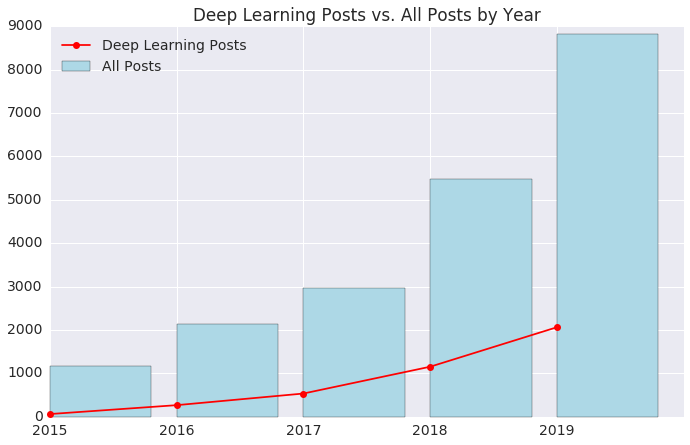

In [31]:
# plot the data 
fig = plt.figure(figsize=(25,7)) 
ax = fig.add_subplot(1,2,1)

ax.plot(year_data.index,'TotalDL_Posts',data=year_data,clip_on = False, color='red', marker='o',label='Deep Learning Posts')
ax.bar(year_data.index,'AllPosts',data=year_data,clip_on = False, color='lightblue',label='All Posts')
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
plt.xticks(year_data.index)
ax.set_xticklabels(year_data.index)
ax.set_title('Deep Learning Posts vs. All Posts by Year')
ax.legend(loc='best')
plt.tick_params(left=False,right=False, top=False,bottom=False)
plt.show()


We can obeserve from the above chart that the questions asked by the DSSE members related to Deep Learning has increased across the span of time from 2015 to 2019, which is  an increase of approximately 23.5%. And clearly, deep learning is becoming popular as time passes.

### 8. Other popularity features

In the dataset `2019_questions.csv`, we have `AnswerCount` and `FavoriteCount` which can be used in our analysis to find out the popularity of the tags based on the number of answers received for the question and the number of times the question marked favorite.

We already have the count of answers and favorites per tags as we found out [here](#ans). 

In [32]:
# AnswerCount - convert ans_count dictionary object to dataframe

AnsCount = (pd.DataFrame.from_dict(ans_count, orient='index')
        .rename_axis('Tags')         
        .reset_index())

AnsCount.rename(columns={0: 'AnswerCount'},inplace=True)

AnsCount.set_index('Tags', inplace=True)
print("Top 10 Tags - Most answered \n")

# sort the dataframe
sorted_answer_count = AnsCount.sort_values(by='AnswerCount', ascending=False)      
sorted_answer_count.head(10)



Top 10 Tags - Most answered 



,AnswerCount
Tags,
machine-learning,2313
python,1507
deep-learning,877
neural-network,824
keras,654
classification,651
scikit-learn,518
pandas,394
nlp,369


In [33]:
## FavoriteCount - # convert fav_count dictionary object to dataframe

FavCount = (pd.DataFrame.from_dict(fav_count, orient='index')
        .rename_axis('Tags')         
        .reset_index())

FavCount.rename(columns={0: 'FavoriteCount'},inplace=True)

FavCount.set_index('Tags', inplace=True)
print("Top 10 Tags marked Favorite  \n")
# sort the dataframe
sorted_fav_count = FavCount.sort_values(by='FavoriteCount', ascending=False)      
sorted_fav_count.head(10)


Top 10 Tags marked Favorite  



,FavoriteCount
Tags,
machine-learning,575
python,325
deep-learning,266
neural-network,227
keras,181
classification,153
scikit-learn,113
cnn,100
time-series,97


In [34]:
# merge sorted ViewCount,AnswerCount and FavoriteCount 
merged = pd.merge(sorted_view_count,sorted_answer_count, how="left", left_index=True,right_index=True)
all_counts = pd.merge(merged,sorted_fav_count, how="left", left_index=True,right_index=True)
all_counts.head(10)

,ViewCount,AnswerCount,FavoriteCount
Tags,,,
python,537585,1507,325
machine-learning,388499,2313,575
keras,268608,654,181
deep-learning,233628,877,266
pandas,201787,394,42
neural-network,185367,824,227
scikit-learn,128110,518,113
tensorflow,121369,353,88
classification,104457,651,153


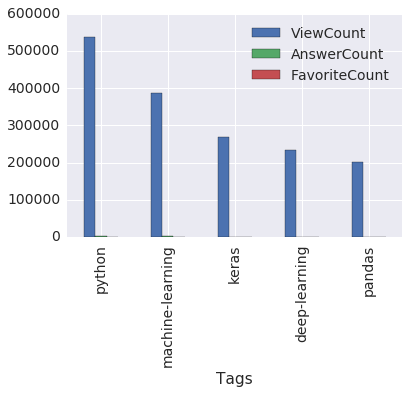

In [35]:

all_counts.head(5).plot(kind='bar')


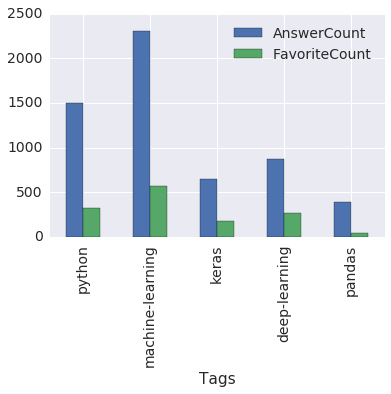

In [36]:
# plot AnswerCount and FavoriteCount

all_counts[['AnswerCount','FavoriteCount']].head(5).plot(kind='bar')
 

Questions with tag `machine-learning` followed by `python` received more answers and also were marked as favorites.

### Conclusion

From our analysis, we found that there is an increase of approx. 23.5% in the Deep Learning questions posted on Data Science Stack Exchange and definitely proves that Deep Learning is turning into one of the most popular topics in DSSE.

Tags `machine-learning` followed by `python`  received more answered and were marked as favorite the most.